In [202]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import re
import pickle

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.multioutput import MultiOutputClassifier, MultiOutputRegressor

from sklearn.metrics import accuracy_score, multilabel_confusion_matrix, \
    plot_confusion_matrix,classification_report, confusion_matrix, precision_score, \
    recall_score, f1_score


In [2]:
mass = pd.read_csv('../data/mass_mobile.csv')

In [3]:
mass.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
mass.columns[0:20]

Index(['id', 'country', 'ccode', 'region', 'protestnumber',
       'protesterviolence', 'location', 'protesteridentity', 'sources',
       'notes', 'protester_id_type', 'partipants_number',
       'protest_size_category', 'pop_male', 'pop_female', 'pop_total',
       'pop_density', 'prosperity_2020', 'country_Afghanistan',
       'country_Albania'],
      dtype='object')

In [36]:
# User dataframe of almost all features.
features_1 = mass.drop(columns=['country', 'ccode', 'region', 'location','protesteridentity', 'sources',
       'notes', 'protester_id_type', 'protest_size_category', 'start_date', 'notes_clean', 'neg', 'neu', 'pos',
       'end_date', 'target', 'arrests', 'accomodation', 'beatings',
       'crowddispersal', 'ignore', 'killings', 'shootings'])
print(f'X will be set to use {features_1.shape[1]} features.')

X will be set to use 211 features.


In [37]:
#country_list
country_column_names = list(features_1.columns[9:174])

In [38]:
#country_column_names

In [39]:
features_1 = features_1.drop(country_column_names, axis=1)

In [42]:
features_1.columns

Index(['id', 'protestnumber', 'protesterviolence', 'partipants_number',
       'pop_male', 'pop_female', 'pop_total', 'pop_density', 'prosperity_2020',
       'region_Africa', 'region_Asia', 'region_Central America',
       'region_Europe', 'region_MENA', 'region_North America',
       'region_Oceania', 'region_South America',
       'protest_size_category_1,000-4,999',
       'protest_size_category_10,000-100,000', 'protest_size_category_100-999',
       'protest_size_category_5,000-9,999', 'protest_size_category_50-99',
       'protest_size_category_Less than 50',
       'protest_size_category_Over 100,000',
       'protester_id_type_civil_human_rights',
       'protester_id_type_ethnic_group', 'protester_id_type_locals_residents',
       'protester_id_type_pensioners_retirees',
       'protester_id_type_political_group', 'protester_id_type_prisoners',
       'protester_id_type_protestors_generic',
       'protester_id_type_religious_group',
       'protester_id_type_soldiers_veteran

In [43]:
features_1 = features_1.drop(['id','protest_duration'], axis=1)

In [44]:
features = ['pop_density', 'prosperity_2020','partipants_number','compound','region_Europe','region_Central America','region_Africa',
'region_MENA', 'region_North America', 'region_Oceania', 'region_South America']

#X = mass[features]

X = features_1
y = np.array(mass[['arrests', 'accomodation', 'beatings',
       'crowddispersal', 'ignore', 'killings', 'shootings']])

y

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]], dtype=int64)

In [97]:
#features_1.info(verbose=True)

In [59]:
len(X)

15179

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [47]:


model_grad_booster = MultiOutputClassifier(GradientBoostingClassifier())

model_random_forest = MultiOutputClassifier(RandomForestClassifier())  

# This chunk for random forest model
hyperparameters_forest = dict(estimator__n_estimators=[20, 50, 100, 200, 300, 500, 1000],
#                        estimator__min_samples_split=[2, 4, 7, 10],
#                        estimator__max_depth=[3, 5, 10, 15, 20, 30],
#                        estimator__min_samples_leaf=[1, 2, 3, 5, 8, 10],
#                        estimator__min_impurity_decrease=[0, 0.2, 0.4, 0.6, 0.8],
                       estimator__max_leaf_nodes=[5, 10, 20, 30, 50, 100, 300])

# This chunck is for GradientBoostingClassifier - grid search
hyperparameters_grad = dict(estimator__learning_rate=[ 0.2, 0.5], 
                     estimator__n_estimators=[20, 50, 100],
                     #  estimator__min_samples_split=[2, 4, 7, 10],
                     estimator__max_depth=[5, 20, 30], 
                   # estimator__min_samples_leaf=[ 5, 8, 10],
                    # estimator__min_impurity_decrease=[0.2, 0.6, 0.8],
                     estimator__max_leaf_nodes=[5, 20, 100])

randomized_search = RandomizedSearchCV(model_random_forest, hyperparameters_forest,
                                       n_jobs=-1, cv=5, verbose=1,
                                       error_score='raise')

# grid_search = GridSearchCV(model_grad_booster, hyperparameters_grad,n_jobs=-1, cv=5, verbose=True,
#                                        pre_dispatch='2*n_jobs', error_score='raise', return_train_score=True)


hyperparameters_tuning = randomized_search.fit(X_train, y_train)

#hyperparameters_tuning = grid_search.fit(X_train, y_train)

print('Best Parameters = {}'.format(hyperparameters_tuning.best_params_))

tuned_model = hyperparameters_tuning.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   40.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.9min finished


Best Parameters = {'estimator__n_estimators': 300, 'estimator__max_leaf_nodes': 300}


In [199]:
hyperparameters_tuning.best_score_

0.557976919033693

In [49]:
y_preds = tuned_model.predict(X_test)

In [53]:
tuned_model.score(X_train, y_train )

0.6248243148278285

In [54]:
tuned_model.score(X_test, y_test)

0.5491436100131752

In [89]:
# Baseline:  Don't think so
#mass['target'].value_counts(normalize=True)

In [205]:
# Hat tip to this blog post:
# https://medium.com/@saugata.paul1010/a-detailed-case-study-on-multi-label-classification-with-machine-learning-algorithms-and-72031742c9aa

print("Accuracy = ", accuracy_score(y_test,y_preds))

precision = precision_score(y_test, y_preds, average='micro')
recall = recall_score(y_test, y_preds, average='micro')
f1 = f1_score(y_test, y_preds, average='micro')
 
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

Accuracy =  0.5491436100131752
Precision: 0.7450, Recall: 0.5323, F1-measure: 0.6209


#### Baseline model

In [195]:
y_train_df = pd.DataFrame(data=y_train, columns=['arrests', 'accomodation', 'beatings',
       'crowddispersal', 'ignore', 'killings', 'shootings'])
y_train_df[0:3]

,arrests,accomodation,beatings,crowddispersal,ignore,killings,shootings
0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,1
2,0,0,0,0,1,0,0


In [198]:
# Sum of all 1's in all columns, divided by the number of rows in the train dataset
pd.DataFrame(y_train_df.sum() / y_train_df.shape[0]).T

,arrests,accomodation,beatings,crowddispersal,ignore,killings,shootings
0,0.141339,0.099262,0.052091,0.31272,0.546205,0.053935,0.06149


### Print confusion matrix for all target variables (state responses)

In [132]:
cm_array = multilabel_confusion_matrix(y_test, y_preds)
cm_array[0]

array([[3248,   13],
       [ 486,   48]], dtype=int64)

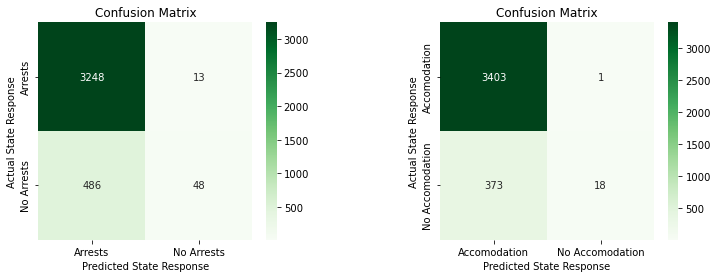

In [184]:
label_names=['arrests', 'accomodation', 'beatings',
       'crowddispersal', 'ignore', 'killings', 'shootings']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
plt.subplots_adjust(wspace=0.5)

sns.heatmap(cm_array[0].astype(int), annot=True, ax = ax1, cmap='Greens', fmt='d'); #annot=True to annotate cells

# labels, title and ticks
ax1.set_xlabel('Predicted State Response');
ax1.set_ylabel('Actual State Response'); 
ax1.set_title('Confusion Matrix'); 
ax1.xaxis.set_ticklabels(['Arrests', 'No Arrests']);
ax1.yaxis.set_ticklabels(['Arrests', 'No Arrests'], va='center');

sns.heatmap(cm_array[1].astype(int), annot=True, ax = ax2, cmap='Greens', fmt='d'); #annot=True to annotate cells

# labels, title and ticks
ax2.set_xlabel('Predicted State Response');
ax2.set_ylabel('Actual State Response'); 
ax2.set_title('Confusion Matrix'); 
ax2.xaxis.set_ticklabels(['Accomodation', 'No Accomodation']);
ax2.yaxis.set_ticklabels(['Accomodation', 'No Accomodation'], va='center');
    

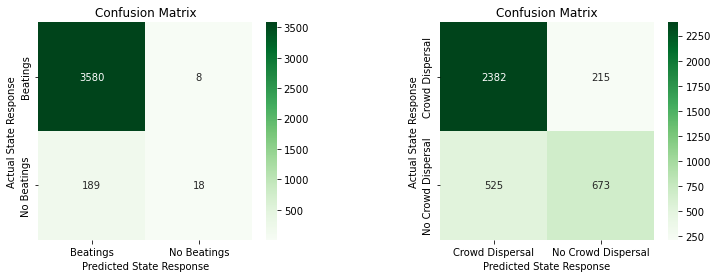

In [185]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
plt.subplots_adjust(wspace=0.5)

sns.heatmap(cm_array[2].astype(int), annot=True, ax = ax1, cmap='Greens', fmt='d'); #annot=True to annotate cells

# labels, title and ticks
ax1.set_xlabel('Predicted State Response');
ax1.set_ylabel('Actual State Response'); 
ax1.set_title('Confusion Matrix'); 
ax1.xaxis.set_ticklabels(['Beatings', 'No Beatings']);
ax1.yaxis.set_ticklabels(['Beatings', 'No Beatings'], va='center');

sns.heatmap(cm_array[3].astype(int), annot=True, ax = ax2, cmap='Greens', fmt='d'); #annot=True to annotate cells

# labels, title and ticks
ax2.set_xlabel('Predicted State Response');
ax2.set_ylabel('Actual State Response'); 
ax2.set_title('Confusion Matrix'); 
ax2.xaxis.set_ticklabels(['Crowd Dispersal', 'No Crowd Dispersal']);
ax2.yaxis.set_ticklabels(['Crowd Dispersal', 'No Crowd Dispersal'], va='center');
    

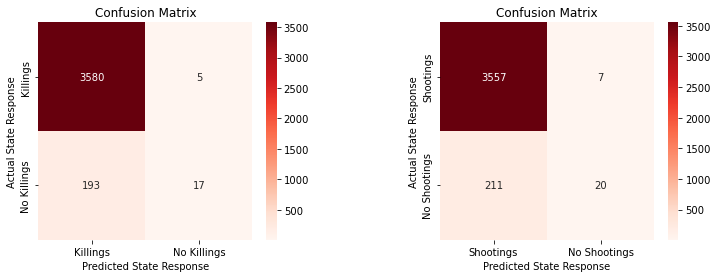

In [188]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
plt.subplots_adjust(wspace=0.5)

sns.heatmap(cm_array[5].astype(int), annot=True, ax = ax1, cmap='Reds', fmt='d'); #annot=True to annotate cells

# labels, title and ticks
ax1.set_xlabel('Predicted State Response');
ax1.set_ylabel('Actual State Response'); 
ax1.set_title('Confusion Matrix'); 
ax1.xaxis.set_ticklabels(['Killings', 'No Killings']);
ax1.yaxis.set_ticklabels(['Killings', 'No Killings'], va='center');

sns.heatmap(cm_array[6].astype(int), annot=True, ax = ax2, cmap='Reds', fmt='d'); #annot=True to annotate cells

# labels, title and ticks
ax2.set_xlabel('Predicted State Response');
ax2.set_ylabel('Actual State Response'); 
ax2.set_title('Confusion Matrix'); 
ax2.xaxis.set_ticklabels(['Shootings', 'No Shootings']);
ax2.yaxis.set_ticklabels(['Shootings', 'No Shootings'], va='center');
    

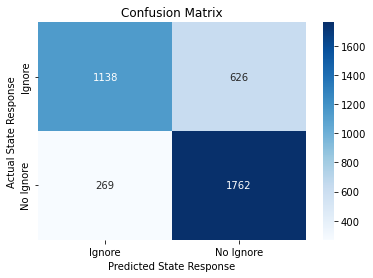

In [194]:
fig, ax1 = plt.subplots(1, 1, figsize=(6,4))
plt.subplots_adjust(wspace=0.5)

sns.heatmap(cm_array[4].astype(int), annot=True, ax = ax1, cmap='Blues', fmt='d'); #annot=True to annotate cells

# labels, title and ticks
ax1.set_xlabel('Predicted State Response');
ax1.set_ylabel('Actual State Response'); 
ax1.set_title('Confusion Matrix'); 
ax1.xaxis.set_ticklabels(['Ignore', 'No Ignore']);
ax1.yaxis.set_ticklabels(['Ignore', 'No Ignore'], va='center');

In [99]:
print( classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.79      0.09      0.16       534
           1       0.95      0.05      0.09       391
           2       0.69      0.09      0.15       207
           3       0.76      0.56      0.65      1198
           4       0.74      0.87      0.80      2031
           5       0.77      0.08      0.15       210
           6       0.74      0.09      0.16       231

   micro avg       0.74      0.53      0.62      4802
   macro avg       0.78      0.26      0.31      4802
weighted avg       0.77      0.53      0.54      4802
 samples avg       0.65      0.60      0.61      4802



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### Get predictions from all rows in X?

In [142]:
y_modeled = tuned_model.predict(X)

In [143]:
y_modeled[0:5]

array([[0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [1, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]], dtype=int64)

#### Compare to model using ClassifierChain

In [66]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

# using classifier chains
from sklearn.multioutput import ClassifierChain
from sklearn.linear_model import LogisticRegression
# initialize classifier chains multi-label classifier
classifier = ClassifierChain(LogisticRegression())
# Training logistic regression model on train data
classifier.fit(X_train_sc, y_train)
# predict
predictions = classifier.predict(X_test_sc)


In [67]:
# accuracy
print("Accuracy = ", accuracy_score(y_test,predictions))
print("\n")

Accuracy =  0.5646903820816864


